# Extended Interval Algebras

This notebook builds on Allen's Interval Algebra by extending in three ways:

1. Points & Intervals -- time points are integrated with time intervals
1. Right-Branching Time -- building on 1, time can also branch to the right (future)
1. Left-Branching Time -- again, building on 1, time can also branch from the left (past)

NOTE: However, left- and right-branching time algebras cannot be mixed.

## References

1. ["Intervals, Points, and Branching Time" by A.J. Reich](https://www.researchgate.net/publication/220810644_Intervals_Points_and_Branching_Time) - basis for the extensions here to Allen's algebra
1. [Allen's Interval Algebra](https://www.ics.uci.edu/~alspaugh/cls/shr/allen.html) or [here](https://thomasalspaugh.org/pub/fnd/allen.html) - summarizes Allen's algebra of proper time intervals
1. ["Maintaining Knowledge about Temporal Intervals" by James F. Allen](https://cse.unl.edu/~choueiry/Documents/Allen-CACM1983.pdf) - Allen's original paper (PDF)


## Dependencies

In [1]:
>>> import qualreas as qr
>>> import os

In [2]:
>>> path = os.path.join(os.getenv('PYPROJ'), 'qualreas')

## 1. Linear Interval and Point Algebra

In Allen's original algebra, time is linear and only applies to proper time intervals, not time points.  So, effectively, it is a <i>Linear Interval Algebra</i>, which is the name used for its JSON definition file.

In [[Reich, 1994](https://www.researchgate.net/publication/220810644_Intervals_Points_and_Branching_Time)], Allen's algebra was extended to include time points, as well as proper intervals, to obtain a <i>Linear Interval & Point Algebra</i>.  We'll describe it in this section.

The Linear Interval & Point algebra extends Allen's algebra by adding 5 new relations, involving time points, and modifies the domains and ranges of 4 of the original 13 relations.

In [3]:
# Instantiate algebra and print some basic info about it
>>> algX = qr.Algebra(os.path.join(path, "Algebras/Extended_Linear_Interval_Algebra.json"))
>>> print(algX.name)
>>> print(algX.description)
>>> algX_num_elements = len(algX.elements)
>>> algX_elem_list = ', '.join(str(algX.elements).split("|"))
>>> print(f"This algebra has the following {algX_num_elements} elements:\n{algX_elem_list}")

Extended_Linear_Interval_Algebra
Extension of Allen's algebra to include points and intervals
This algebra has the following 18 elements:
B, BI, D, DI, E, F, FI, M, MI, O, OI, PE, PF, PFI, PS, PSI, S, SI


Figure 1, below, from [Reich 1994](https://www.researchgate.net/publication/220810644_Intervals_Points_and_Branching_Time), shows the domain and range modifications to the original 13 relations. The subscripts on the temporal entities, X and Y, indicate that they can be proper intervals ("i") or points ("p") or both ("ip"). Where the subscript is "i" alone for both domain and range (X & Y)  the original relations are unchanged.

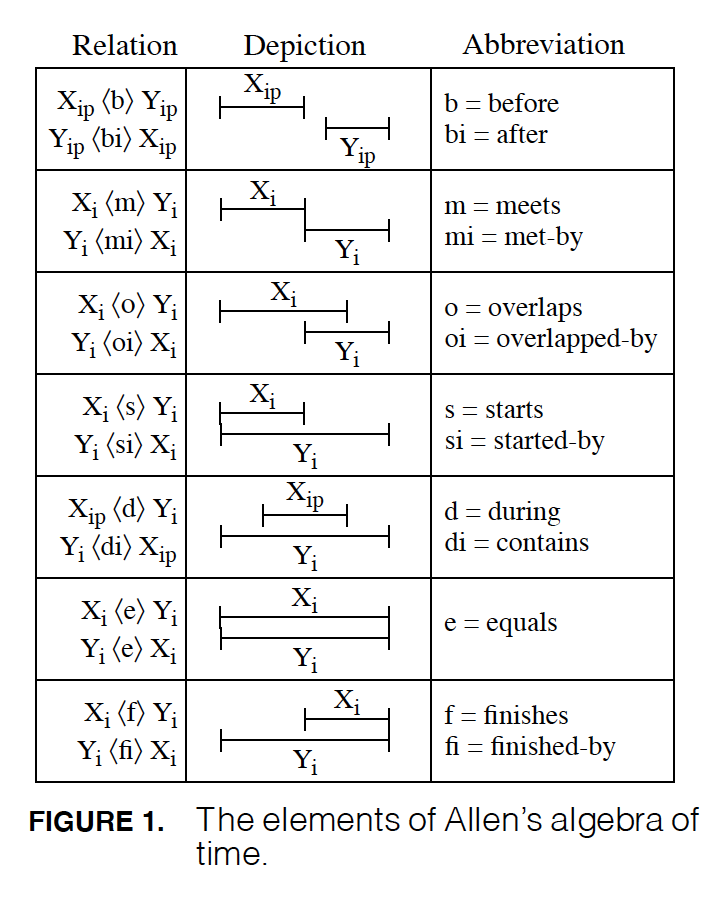

In [4]:
from IPython.display import Image  # Only needed to display figures here
Image(filename='../docs/_static/Extension_of_Allens_Interval_Relations.png', width="400")

The 5 additional relations needed to integrate Points with Intervals are shown in Figure 2, below.  The meaning of the subscripts remains the same as above.

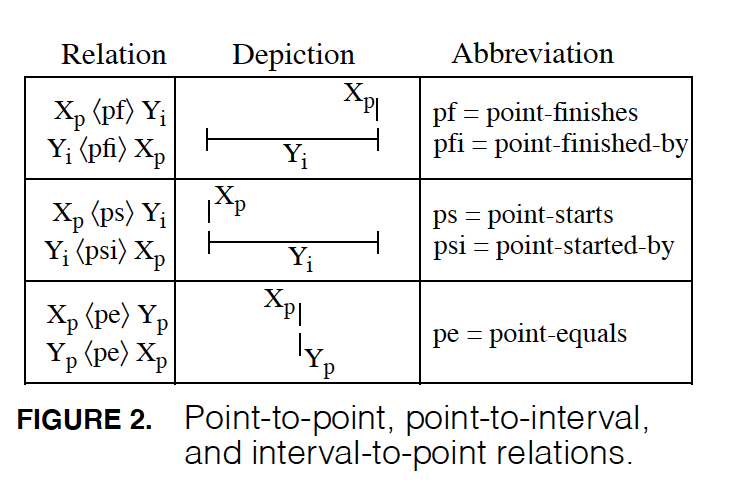

In [5]:
Image(filename='../docs/_static/Point_Interval_Relations.png', width="400") 

In [6]:
>>> algX.summary()

  Algebra Name: Extended_Linear_Interval_Algebra
   Description: Extension of Allen's algebra to include points and intervals
 Equality Rels: E|PE
     Relations:
            NAME (SYMBOL)         CONVERSE (ABBREV)  REFLEXIVE  SYMMETRIC TRANSITIVE   DOMAIN        RANGE
             Before (  B)               After ( BI)    False      False       True    Pt|PInt       Pt|PInt
              After ( BI)              Before (  B)    False      False       True    Pt|PInt       Pt|PInt
             During (  D)            Contains ( DI)    False      False       True    Pt|PInt          PInt
           Contains ( DI)              During (  D)    False      False       True       PInt       Pt|PInt
             Equals (  E)              Equals (  E)     True       True       True       PInt          PInt
           Finishes (  F)         Finished-by ( FI)    False      False       True       PInt          PInt
        Finished-by ( FI)            Finishes (  F)    False      False       True

### Equality Relations

The number and type of equality relations in an algebra depends on the number and type of entities (e.g., 'Point', 'ProperInterval') related by relations in the algebra.

The Extended Linear Interval Algebra supports both <i>ProperIntervals</i> and <i>Points</i>.

In [7]:
>>> print(f"\n{algX.name}")
>>> print(f"Set of all equality relations: {algX.all_equality_relations}")
>>> for eq_rel in algX.all_equality_relations:
        print(50*"-")
        algX.element_summary(eq_rel)
>>> print(50*"-")


Extended_Linear_Interval_Algebra
Set of all equality relations: E|PE
--------------------------------------------------
                  Symbol: E
                    Name: Equals
                  Domain: ['ProperInterval']
                   Range: ['ProperInterval']
                Converse: Equals
           Is Reflexive?: True
           Is Symmetric?: True
          Is Transitive?: True
Is an Equality Relation?: True
--------------------------------------------------
                  Symbol: PE
                    Name: Point-Equals
                  Domain: ['Point']
                   Range: ['Point']
                Converse: Point-Equals
           Is Reflexive?: True
           Is Symmetric?: True
          Is Transitive?: True
Is an Equality Relation?: True
--------------------------------------------------


### Check Composition Identity

If $r$ and $s$ are two relations, then $!(r;s) = (!s);(!r)$
<p>The <i><b>check_composition_identity</b></i> Algebra method checks every possible pairing of individual algebra relations wrt the composition identity, and returns True if all pairs check out.</p>

In [8]:
>>> print(f"There are {algX_num_elements**2} ({algX_num_elements}x{algX_num_elements}) possible compositions.")
>>> algX.check_composition_identity(verbose=True)

There are 324 (18x18) possible compositions.

Extended_Linear_Interval_Algebra -- Composition Identity Check:
PASSED . 324 products tested.


True

### Check Associativity

The <i><b>is_associative</b></i> Algebra method checks all possible triples of individual algebra relations and, if the domains and ranges are "compatible", checks to see if the triple is associative.  Incompatible triples are skipped.  It returns True if all compatible triples are associative.

In [9]:
>>> print(f"\n{algX.name}:")
>>> print(f"There are {algX_num_elements}^3 = {algX_num_elements**3} ways we can combine the algebra's elements to test associativity.\n")
>>> algX.is_associative()


Extended_Linear_Interval_Algebra:
There are 18^3 = 5832 ways we can combine the algebra's elements to test associativity.

TEST SUMMARY: 3609 OK, 2223 Skipped, 0 Failed (5832 Total)


True

## 2. Right-Branching Interval and Point Algebra

In [[Reich, 1994](https://www.researchgate.net/publication/220810644_Intervals_Points_and_Branching_Time)], the Linear Interval and Point Algebra described above was further extended to support <b>Branching Time</b>.  Both Right-Branching Time and Left-Branching Time are possible, but not both together at the same time.

Figure 9 from [[Reich, 1994](https://www.researchgate.net/publication/220810644_Intervals_Points_and_Branching_Time)] depicts the 6 new relations required to support Right-Branching Time, in addition to the 18 described above.

In [10]:
# Instantiate algebra and print some basic info about it
>>> algR = qr.Algebra(os.path.join(path, "Algebras/Right_Branching_Interval_Algebra.json"))
>>> print(algR.name)
>>> print(algR.description)
>>> algR_num_elements = len(algR.elements)
>>> algR_elem_list = ', '.join(str(algR.elements).split("|"))
>>> print(f"This algebra has the following {algR_num_elements} elements:\n{algR_elem_list}")

Right_Branching_Interval_Algebra
Reich's right-branching extension to Allen's time interval algebra (see TIME-94 paper)
This algebra has the following 24 elements:
B, BI, D, DI, E, F, FI, M, MI, O, OI, PE, PF, PFI, PS, PSI, RB, RBI, RO, ROI, RS, R~, S, SI


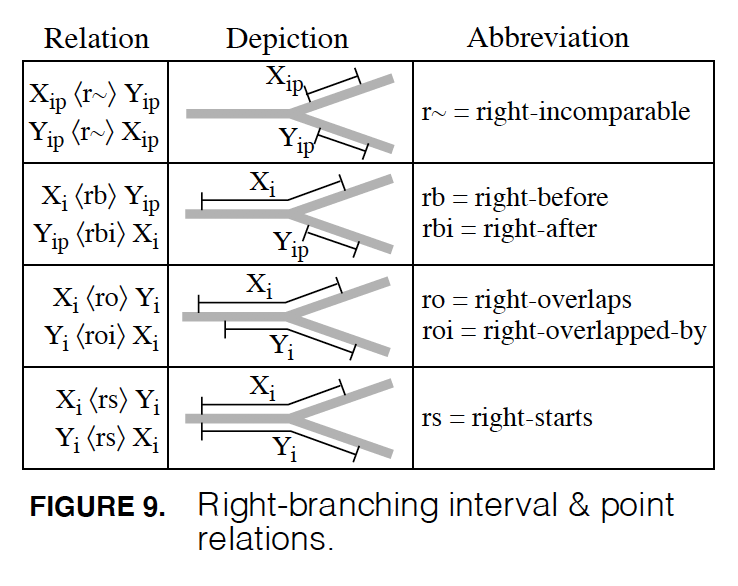

In [11]:
Image(filename='../docs/_static/Right_Branching_Time_Relations.png', width="400")

In [12]:
>>> algR.summary()

  Algebra Name: Right_Branching_Interval_Algebra
   Description: Reich's right-branching extension to Allen's time interval algebra (see TIME-94 paper)
 Equality Rels: E|PE
     Relations:
            NAME (SYMBOL)         CONVERSE (ABBREV)  REFLEXIVE  SYMMETRIC TRANSITIVE   DOMAIN        RANGE
             Before (  B)               After ( BI)    False      False       True    Pt|PInt       Pt|PInt
              After ( BI)              Before (  B)    False      False       True    Pt|PInt       Pt|PInt
             During (  D)            Contains ( DI)    False      False       True    Pt|PInt          PInt
           Contains ( DI)              During (  D)    False      False       True       PInt       Pt|PInt
             Equals (  E)              Equals (  E)     True       True       True       PInt          PInt
           Finishes (  F)         Finished-by ( FI)    False      False       True       PInt          PInt
        Finished-by ( FI)            Finishes (  F)    F

## 3. Left-Branching Interval and Point Algebra

Figure 10 from [[Reich, 1994](https://www.researchgate.net/publication/220810644_Intervals_Points_and_Branching_Time)] depicts the 6 new relations required to support Left-Branching Time, in addition to the 18 described, above, for the Extended Linear Interval Algebra.

In [13]:
# Instantiate algebra and print some basic info about it
>>> algL = qr.Algebra(os.path.join(path, "Algebras/Left_Branching_Interval_Algebra.json"))
>>> print(algL.name)
>>> print(algL.description)
>>> algL_num_elements = len(algL.elements)
>>> algL_elem_list = ', '.join(str(algL.elements).split("|"))
>>> print(f"This algebra has the following {algL_num_elements} elements:\n{algL_elem_list}")

Left_Branching_Interval_Algebra
Reich's left-branching extension to Allen's time interval algebra (see TIME-94 paper)
This algebra has the following 24 elements:
B, BI, D, DI, E, F, FI, LB, LBI, LF, LO, LOI, L~, M, MI, O, OI, PE, PF, PFI, PS, PSI, S, SI


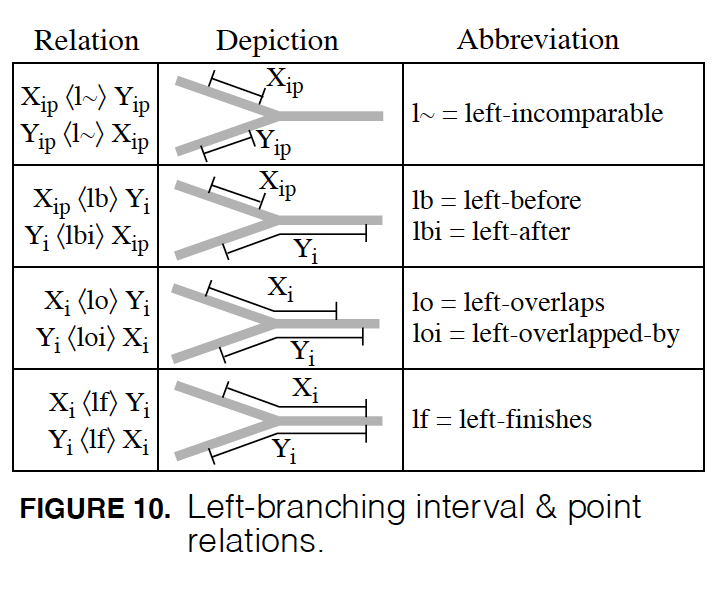

In [14]:
Image(filename='../docs/_static/Left_Branching_Time_Relations.png', width="400")

In [15]:
>>> algL.summary()

  Algebra Name: Left_Branching_Interval_Algebra
   Description: Reich's left-branching extension to Allen's time interval algebra (see TIME-94 paper)
 Equality Rels: E|PE
     Relations:
            NAME (SYMBOL)         CONVERSE (ABBREV)  REFLEXIVE  SYMMETRIC TRANSITIVE   DOMAIN        RANGE
             Before (  B)               After ( BI)    False      False       True    Pt|PInt       Pt|PInt
              After ( BI)              Before (  B)    False      False       True    Pt|PInt       Pt|PInt
             During (  D)            Contains ( DI)    False      False       True    Pt|PInt          PInt
           Contains ( DI)              During (  D)    False      False       True       PInt       Pt|PInt
             Equals (  E)              Equals (  E)     True       True       True       PInt          PInt
           Finishes (  F)         Finished-by ( FI)    False      False       True       PInt          PInt
        Finished-by ( FI)            Finishes (  F)    Fal

## Pick one of the branching algebras to use for examples

In [16]:
>>> alg = algR  # Other choice is algL

## Algebra Element Summary

A domain (or range) of ['Point', 'ProperInterval'] means that the Temporal Entity being related can be a 'Point' or a 'ProperInterval', but not both at the same time.

Here are a few element summaries:

In [17]:
>>> from random import sample

>>> sample_size = 3

>>> for element in sample(list(alg.elements), sample_size):
        alg.element_summary(element)
        print("\n")

                  Symbol: OI
                    Name: Overlapped-By
                  Domain: ['ProperInterval']
                   Range: ['ProperInterval']
                Converse: Overlaps
           Is Reflexive?: False
           Is Symmetric?: False
          Is Transitive?: False
Is an Equality Relation?: False


                  Symbol: PFI
                    Name: Point-Finished-By
                  Domain: ['ProperInterval']
                   Range: ['Point']
                Converse: Point-Finishes
           Is Reflexive?: False
           Is Symmetric?: False
          Is Transitive?: False
Is an Equality Relation?: False


                  Symbol: RBI
                    Name: Right-After
                  Domain: ['Point', 'ProperInterval']
                   Range: ['ProperInterval']
                Converse: Right-Before
           Is Reflexive?: False
           Is Symmetric?: False
          Is Transitive?: True
Is an Equality Relation?: False




## Equality Relations

The number and type of equality relations in an algebra depends on the number and type of domains and ranges supported by the algebra.  (e.g., 'Point', 'ProperInterval', or both)

In [18]:
>>> print(f"\n{alg.description}")
>>> print(f"Set of all equality relations: {alg.all_equality_relations}")


Reich's right-branching extension to Allen's time interval algebra (see TIME-94 paper)
Set of all equality relations: E|PE


Here are element summaries of the algebra's equality relations:

In [19]:
>>> for eq_rel in alg.all_equality_relations:
        print(50*"-")
        print(f"{eq_rel}:")
        alg.element_summary(eq_rel)
>>> print(50*"-")

--------------------------------------------------
E:
                  Symbol: E
                    Name: Equals
                  Domain: ['ProperInterval']
                   Range: ['ProperInterval']
                Converse: Equals
           Is Reflexive?: True
           Is Symmetric?: True
          Is Transitive?: True
Is an Equality Relation?: True
--------------------------------------------------
PE:
                  Symbol: PE
                    Name: Point-Equals
                  Domain: ['Point']
                   Range: ['Point']
                Converse: Point-Equals
           Is Reflexive?: True
           Is Symmetric?: True
          Is Transitive?: True
Is an Equality Relation?: True
--------------------------------------------------


## Creating Relation Sets

There are two acceptable input formats for creating relation sets:

In [20]:
>>> relset_version1 = alg.relset("B|M|FI")
>>> relset_version2 = alg.relset(['B', 'FI', 'M'])
>>> print(relset_version1)
>>> print(relset_version2)
>>> print(f"Same? {relset_version1 == relset_version2}")

B|FI|M
B|FI|M
Same? True


Singleton sets can also be created in two ways:

In [21]:
>>> singleton_relset_v1 = alg.relset("B")
>>> singleton_relset_v2 = alg.relset(["B"])
>>> print(singleton_relset_v1)
>>> print(singleton_relset_v2)
>>> print(f"Same? {singleton_relset_v1 == singleton_relset_v2}")

B
B
Same? True


And, there are two ways the empty set can be created:

In [22]:
>>> empty_relset_v1 = alg.relset("")
>>> empty_relset_v2 = alg.relset([])
>>> print(empty_relset_v1)  # Nothing will printout here.
>>> print(empty_relset_v2)  # Nor here.
>>> print(f"Same? {empty_relset_v1 == empty_relset_v2}")

>>> empty_relset_v1  # Just so we can see something that looks empty...



Same? True


relset()

## Operations on Relation Sets

### Addition

Addition (+) is set intersection:

In [23]:
>>> alg.relset('B|M|O') + alg.relset('F|O|M|S')

relset(['M', 'O'])

In [24]:
>>> alg.relset('B|M|O') + alg.relset('F|S')

relset()

### Composition

Composition, sometimes referred to as "multiplication", is relation composition applied to sets of relations.  (https://en.wikipedia.org/wiki/Composition_of_relations)

Loosely speaking, let $\rho, \sigma, \tau$ be relation sets, then $\rho ; \sigma = \tau$, if, by transitivity, $(A \rho B) \wedge (B \sigma C) \Rightarrow (A \tau C)$.

The transitivity table in the algebra's JSON definition file describes how singleton relation sets compose with each other.  When more than one relation appears in a set, the result of composition is the union of all pairwise compositions of the individual relations in the sets.

For example, below, we calculate (F|MI);(O|D) and then break it down into 4 different compositions involving single relations, representing the pairwise compositions of F|MI and O|D:

In [25]:
>>> rel1 = "F"
>>> rel2= "O"
>>> rel3 = "MI"
>>> rel4 = "D"
>>> print(f"({rel1}|{rel3});({rel2}|{rel4}) = {alg.compose(alg.relset('F|MI'), alg.relset('O|D'))}")

(F|MI);(O|D) = D|F|O|OI|ROI|S


In [26]:
>>> print(f"{rel1};{rel2} = {alg.compose(alg.relset(rel1), alg.relset(rel2))}")
>>> print(f"{rel1};{rel4} = {alg.compose(alg.relset(rel1), alg.relset(rel4))}")
>>> print(f"{rel3};{rel2} = {alg.compose(alg.relset(rel3), alg.relset(rel2))}")
>>> print(f"{rel3};{rel4} = {alg.compose(alg.relset(rel3), alg.relset(rel4))}")

F;O = D|O|S
F;D = D
MI;O = D|F|OI|ROI
MI;D = D|F|OI|ROI


### Some Compositions Will Result in the Empty Set

Not every composition of relations makes sense, in which case, the result will be the empty relation set.

For example, consider the relations F and PF in the Extended Interval Algebra. Their properties are shown below.

Note that the range of F is 'ProperInterval', whereas the domain of PF is 'Point'.

In [27]:
>>> alg.element_summary("F")
>>> print("\n")
>>> alg.element_summary("PF")

                  Symbol: F
                    Name: Finishes
                  Domain: ['ProperInterval']
                   Range: ['ProperInterval']
                Converse: Finished-by
           Is Reflexive?: False
           Is Symmetric?: False
          Is Transitive?: True
Is an Equality Relation?: False


                  Symbol: PF
                    Name: Point-Finishes
                  Domain: ['Point']
                   Range: ['ProperInterval']
                Converse: Point-Finished-By
           Is Reflexive?: False
           Is Symmetric?: False
          Is Transitive?: False
Is an Equality Relation?: False


if A, B, and C are Temporal Entities, then:

1. the expression (A Finishes B) implies that B is a Proper Interval
1. the expression (B Point-Finishes C) implies that B is a Point

Since B cannot be both a Point and a Proper Interval, the composition, F;PF, results in the empty set, as shown below:

In [28]:
>>> alg.compose(alg.relset("F"), alg.relset("PF"))

relset()

### Converses

<u><b>NOTATION</b></u>:  Here, we'll denote the converse operation with "!".  So, if $A$ and $B$ are Temporal Entities, and $r$ is a relation between them, then $!r$ is its converse relation, so, $A r B$ if and only if $B !r A$.  For example, "A before B" if and only if "B after A".

Individual relations have converses:

In [29]:
>>> rel_symbol = 'B'
>>> print(f"The converse of {alg.rel_name(rel_symbol)} is {alg.rel_converse_name(rel_symbol)}")

The converse of Before is After


And relation sets also have converses:

In [30]:
>>> print(f"!{alg.relset(rel_symbol)} = {alg.converse(alg.relset(rel_symbol))}")
>>> print(f"!({alg.converse(relset_version1)}) = {relset_version1}")

!B = BI
!(BI|F|MI) = B|FI|M


### Complement of a Relation Set

The complement of a relation set, R, is the set of all relation elements that are not in R.

We'll use ~R to denote the complement of R.

In [31]:
>>> R = alg.relset('B|BI|D|DI|E|F|FI|M|MI|O|OI')
>>> compR = R.complement()

>>> print(f"\nAll Elements = {alg.elements}")
>>> print(f"          R  = {R}")
>>> print(f"         ~R  =                            {compR}")
>>> print(f"       ~(~R) = {compR.complement()}")


All Elements = B|BI|D|DI|E|F|FI|M|MI|O|OI|PE|PF|PFI|PS|PSI|RB|RBI|RO|ROI|RS|R~|S|SI
          R  = B|BI|D|DI|E|F|FI|M|MI|O|OI
         ~R  =                            PE|PF|PFI|PS|PSI|RB|RBI|RO|ROI|RS|R~|S|SI
       ~(~R) = B|BI|D|DI|E|F|FI|M|MI|O|OI


## Global Properties of an Algebra of Relations

There are two properties of an Algebra that are true for all <i>applicable</i> elements in the algebra:

1. The <b>Composition Identity</b>; true for all elements
1. <b>Associativity</b>; true when domains & ranges are <i>compatible</i>, undefined otherwise.  See the section on Domain-Range Compatibility, below.

### Composition Identity

If $r$ and $s$ are two relations, then $!(r;s) = (!s);(!r)$

Here's an example:

In [32]:
>>> r = alg.relset("O")
>>> s = alg.relset("F")

>>> conv_comp_r_s = alg.converse(alg.compose(r, s))
>>> print(f"!({r};{s}) = {conv_comp_r_s}")

>>> comp_conv_s_conv_r = alg.compose(alg.converse(s), alg.converse(r))
>>> print(f"!{s};!{r} = {comp_conv_s_conv_r}")

>>> print(f"Same? {conv_comp_r_s == comp_conv_s_conv_r}")

!(O;F) = DI|OI|SI
!F;!O = DI|OI|SI
Same? True


The <i><b>check_composition_identity</b></i> Algebra method checks every possible pairing of individual algebra relations wrt the composition identity, and returns True if all pairs check out.

In [33]:
>>> algX.check_composition_identity(verbose=True)


Extended_Linear_Interval_Algebra -- Composition Identity Check:
PASSED . 324 products tested.


True

### Associativity

The <i><b>is_associative</b></i> Algebra method checks all possible triples of individual algebra relations and, if the domains and ranges are "compatible", checks to see if the triple is associative.  Incompatible triples are skipped.  It returns True if all compatible triples are associative.

In [34]:
>>> num_elements = len(alg.elements)
>>> print(f"There are {num_elements}^3 = {num_elements**3} ways we can combine the algebra's elements to test associativity.")

There are 24^3 = 13824 ways we can combine the algebra's elements to test associativity.


The following method tests all of those ways, skipping the ones that don't make sense due to range-domain mismatches.

In [35]:
>>> alg.is_associative()

TEST SUMMARY: 9772 OK, 4052 Skipped, 0 Failed (13824 Total)


True

<b>Domain-Range Compatibility:</b>

The following comment from the source code describes how domains and ranges make some compositions of relations impossible to compute ("incompatible"). This occurs, for example, in the extensions to Allen's algebra found in the paper by [Reich, 1994](https://www.researchgate.net/publication/220810644_Intervals_Points_and_Branching_Time), where <i>ProperIntervals</i> and <i>Points</i> are integrated.

In [36]:
# All relations have a domain and a range.  If D1, R1, D2, and R2 are the domains and ranges
# of relations r1 & r2, resp., then the composition of r1 and r2 (written r1;r2 in algebraic
# logic literature) requires that the intersection of R1 and D2 be non-empty.  To see why,
# consider what the composition means wrt the associated Temporal Entities, teA, teB, and
# teC, where (teA r1 teB) and (teB r2 teC).  The ontological classes that teB belongs to
# must include the range of r1 (R1) and the domain of r2 (D2) for r1;r2 to make sense.
#
#                r1         r2
#          teA -----> teB -----> teC
#           D1       R1,D2        R2
#            |                    ^
#            |                    |
#            +--------------------+
#                     r1;r2
#
# Matrix multiplication, M x N, provides an analogy: the number of columns of M must
# match the number of rows of N.